In [4]:
import pandas as pd
import json

# Specify file paths
files = [
    "C:/Users/Asus/Downloads/StreamingHistory_music_0.json",
    "C:/Users/Asus/Downloads/StreamingHistory_music_1.json"
]

# Load and merge files
streaming_history = []
for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        streaming_history.extend(json.load(f))

# Convert to DataFrame
streaming_df = pd.DataFrame(streaming_history)

# Let's check the first 5 lines
print(streaming_df.head())


            endTime       artistName               trackName  msPlayed
0  2023-12-25 17:02       Funda Arar         Doldur Yüreğimi    111356
1  2023-12-26 10:43       Norm Ender  Parla - 100. Yıl Marşı      2730
2  2023-12-26 10:43       Sezen Aksu        Bir Çocuk Sevdim       790
3  2023-12-26 10:43  Stephen Sanchez       Until I Found You      3300
4  2023-12-26 11:17       Mert Demir            Ateşe Düştüm     66870


In [5]:
# Let's process the time columns
streaming_df['endTime'] = pd.to_datetime(streaming_df['endTime'])
streaming_df['date'] = streaming_df['endTime'].dt.date
streaming_df['hour'] = streaming_df['endTime'].dt.hour
streaming_df['weekday'] = streaming_df['endTime'].dt.weekday

# Convert listening time to seconds
streaming_df['msPlayed'] = streaming_df['msPlayed'] / 1000  # Milisaniyeden saniyeye

# Let's check the first 5 lines again
print(streaming_df.head())

              endTime       artistName               trackName  msPlayed  \
0 2023-12-25 17:02:00       Funda Arar         Doldur Yüreğimi   111.356   
1 2023-12-26 10:43:00       Norm Ender  Parla - 100. Yıl Marşı     2.730   
2 2023-12-26 10:43:00       Sezen Aksu        Bir Çocuk Sevdim     0.790   
3 2023-12-26 10:43:00  Stephen Sanchez       Until I Found You     3.300   
4 2023-12-26 11:17:00       Mert Demir            Ateşe Düştüm    66.870   

         date  hour  weekday  
0  2023-12-25    17        0  
1  2023-12-26    10        1  
2  2023-12-26    10        1  
3  2023-12-26    10        1  
4  2023-12-26    11        1  


In [6]:
# Most streamed artists
top_artists = streaming_df['artistName'].value_counts().head(10)
print("Top 10 Artists:\n", top_artists)

# Most listened songs
top_tracks = streaming_df['trackName'].value_counts().head(10)
print("Top 10 Tracks:\n", top_tracks)

# Hourly listening density
listening_by_hour = streaming_df.groupby('hour').size()
print("Listening by Hour:\n", listening_by_hour)

Top 10 Artists:
 Canozan                 693
Sezen Aksu              683
Hande Yener             569
Yalın                   528
Mert Demir              385
Gülden Karaböcek        370
Dolu Kadehi Ters Tut    258
Sertab Erener           231
Dedublüman              214
Murat Dalkılıç          195
Name: artistName, dtype: int64
Top 10 Tracks:
 Bir Bela                    211
Ağlama ben ağlarım          188
Ben Senin Delinim           147
Sen Evlisin                 143
Gel Barışalım Artık         142
Toprak Yağmura - Akustik    139
Dilerim Ki                  139
Yalan Dünya                 108
Dön Bana                     90
Lan                          89
Name: trackName, dtype: int64
Listening by Hour:
 hour
0       65
1       47
2       44
3      196
4      474
5      324
6      266
7      529
8      457
9      621
10     806
11     709
12     782
13    1001
14    1415
15     839
16     471
17     876
18     880
19     860
20    1005
21     927
22     306
23     134
dtype: int64


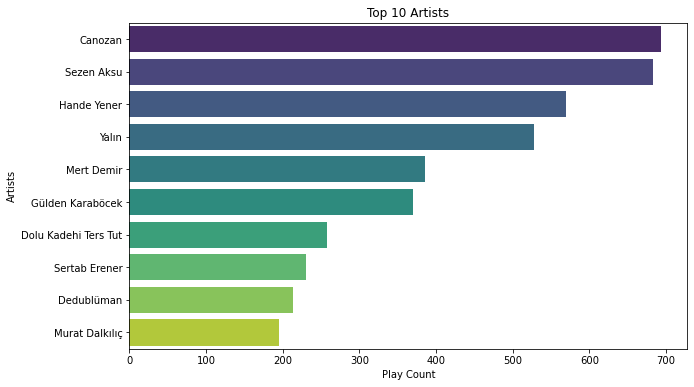

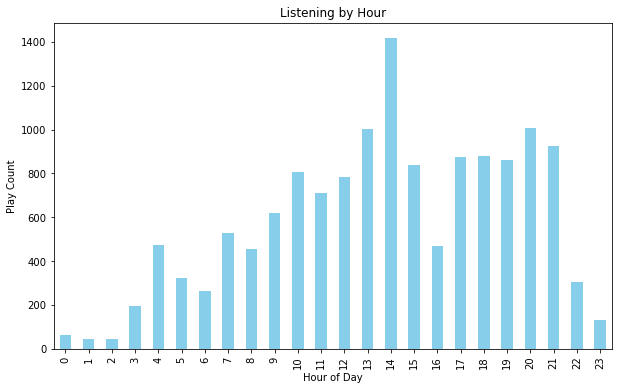

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Artists
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title("Top 10 Artists")
plt.xlabel("Play Count")
plt.ylabel("Artists")
plt.show()

# Hourly Listening Intensity
plt.figure(figsize=(10, 6))
listening_by_hour.plot(kind='bar', color='skyblue')
plt.title("Listening by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Play Count")
plt.show()


Top 10 Tracks:
 Bir Bela                    211
Ağlama ben ağlarım          188
Ben Senin Delinim           147
Sen Evlisin                 143
Gel Barışalım Artık         142
Toprak Yağmura - Akustik    139
Dilerim Ki                  139
Yalan Dünya                 108
Dön Bana                     90
Lan                          89
Name: trackName, dtype: int64


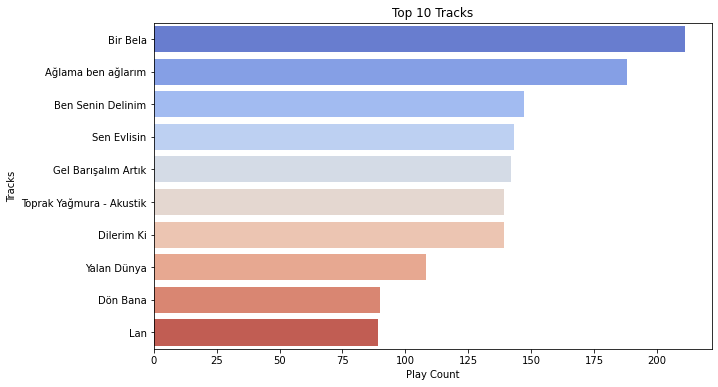

In [10]:
# Most listened songs
top_tracks = streaming_df['trackName'].value_counts().head(10)
print("Top 10 Tracks:\n", top_tracks)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tracks.values, y=top_tracks.index, palette='coolwarm')
plt.title("Top 10 Tracks")
plt.xlabel("Play Count")
plt.ylabel("Tracks")
plt.show()


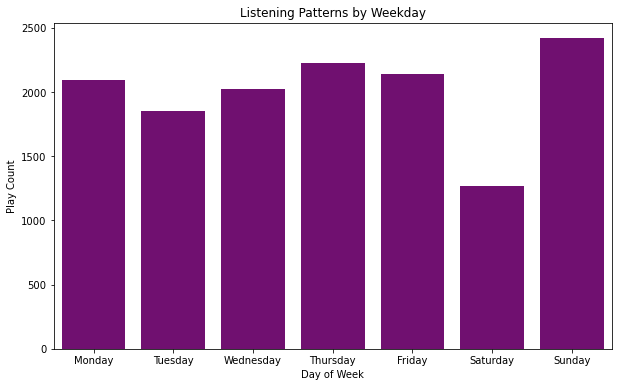

In [12]:
# Listening intensity by day of the week
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
listening_by_weekday = streaming_df.groupby('weekday').size()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_labels, y=listening_by_weekday.values, color='purple')
plt.title("Listening Patterns by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Play Count")
plt.show()